# What drives the price of a car?

![](images/kurt.jpeg)

a good analsis:
https://github.com/avidunixuser/UsedCarFeatureImportance/blob/main/3.%20models.ipynb

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = /image/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

Data problem definition: Identify and Analyze key factors that affect the selling price of the used car.

# **What Do Consumers Value in a Used Car?**
In the given dataset and the question asked, "What do consumers value in a used car?" can be reinterpreted as "What asking price should a used car dealer set for the cars on their lot?"

This interpretation makes more sense from a dealer’s perspective. A bigger question for a dealer would be to determine two key price points:

The purchase price – How much should I pay for a car at an auction? The asking price – What price should I set when selling the car? Since the dataset contains only one price column, and it is not explicitly defined as either the purchase price or the asking price, I will focus on answering the latter question.

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Data Understanding

According to the CRISP-DM process, the first step is to understand the business.

### Business Understanding:

From the data overview, it is clear that the business deals with purchasing used cars and needs to determine the asking price for selling them.

### Data Understanding:

By examining a few rows and the dataset information, we see that the dataset consists of over 400,000 records from various car manufacturers, including different models, their condition, year of manufacture, and car specifications such as color, engine type, and location of the car. I assume that this location represents where the car is currently situated for sale. The data also contains two identifier columns.


In [ ]:
vehicle = pd.read_csv('/content/sample_data/vehicles.csv')
vehicle.info()

vehicle = vehicle.convert_dtypes()
vehicle.info()
vehicle

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,az
1,7218891961,fayetteville,11900,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,ar
2,7221797935,florida keys,21000,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,fl
3,7222270760,worcester / central MA,1500,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,ma
4,7210384030,greensboro,4900,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226,clean,other,1N4AA6AV6KC367801,fwd,<NA>,sedan,<NA>,wy
426876,7301591187,wyoming,30590,2020,volvo,s60 t5 momentum sedan 4d,good,<NA>,gas,12029,clean,other,7JR102FKXLG042696,fwd,<NA>,sedan,red,wy
426877,7301591147,wyoming,34990,2020,cadillac,xt4 sport suv 4d,good,<NA>,diesel,4174,clean,other,1GYFZFR46LF088296,<NA>,<NA>,hatchback,white,wy
426878,7301591140,wyoming,28990,2018,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112,clean,other,58ABK1GG4JU103853,fwd,<NA>,sedan,silver,wy


### Exploratory Data Analysis:



1.   Create charts for numerical columns.
2.   Check how many unique values exist in each categorical column.


### Data Preparation:

To build a price prediction model, the dataset needs to be cleaned, as it contains many null values, unwanted columns, and incorrect data types. The following steps will be performed to clean the data:

1. Remove columns that are not useful.
2. Remove columns with more than 50% null values.
3. Remove rows with empty target values, manufacturer, or model type, as these three fields seem to be highly relevant.
4. Replace empty values: Forward fill will be used to replace empty values after sorting the data by manufacturer and model. The idea is that the same manufacturer and model should have similar values.
5. Split the dataset into training and testing datasets.




In [ ]:
vehicle = vehicle.drop(['id', 'VIN'], axis=1)

In [ ]:
null_count = (vehicle.isnull().sum())/len(vehicle)
print('Number of null values:', null_count)

Number of null values: region          0.000000
price           0.000000
year            0.002823
manufacturer    0.041337
model           0.012362
condition       0.407852
cylinders       0.416225
fuel            0.007058
odometer        0.010307
title_status    0.019308
transmission    0.005988
drive           0.305863
size            0.717675
type            0.217527
paint_color     0.305011
state           0.000000
dtype: float64


In [ ]:
#drop size as there are too many null values.

vehicle =vehicle.drop(['size'], axis=1)

In [ ]:
vehicle = vehicle.dropna(subset=['year', 'manufacturer', 'model'])

In [ ]:
vehicle

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,auburn,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923,clean,other,<NA>,pickup,white,al
28,auburn,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229,clean,other,<NA>,pickup,blue,al
29,auburn,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160,clean,other,<NA>,pickup,red,al
30,auburn,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124,clean,other,<NA>,pickup,red,al
31,auburn,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000,clean,automatic,rwd,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226,clean,other,fwd,sedan,<NA>,wy
426876,wyoming,30590,2020,volvo,s60 t5 momentum sedan 4d,good,<NA>,gas,12029,clean,other,fwd,sedan,red,wy
426877,wyoming,34990,2020,cadillac,xt4 sport suv 4d,good,<NA>,diesel,4174,clean,other,<NA>,hatchback,white,wy
426878,wyoming,28990,2018,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112,clean,other,fwd,sedan,silver,wy


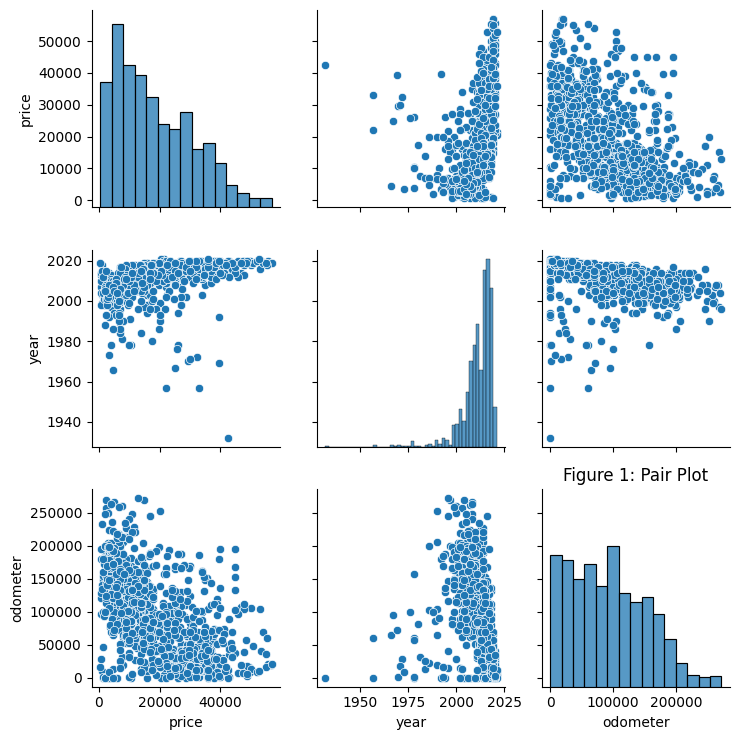

In [ ]:
df2=vehicle.sample(1000)
df2.shape

sns.pairplot(df2)
plt.title('Figure 1: Pair Plot')
plt.tight_layout()
plt.show()

In [ ]:
def remove_outliers_iqr(df, column_name):
    """Removes outliers from the specified column using the IQR method."""
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]


#remove outlines from price and odometer collums
vehicle = remove_outliers_iqr(vehicle, 'price')
vehicle = remove_outliers_iqr(vehicle, 'odometer')

#remove vehicles with price below $500
vehicle = vehicle[(vehicle['price']>500)]


In [ ]:
for col in vehicle:
    if vehicle[col].dtype == 'string':
        #print(f"Unique value in '{col}':")
        #print(pd.unique(vehicle[col]))
        print(f"Count of unique values in '{col}': {len(pd.unique(vehicle[col]))}")


Count of unique values in 'region': 404
Count of unique values in 'manufacturer': 41
Count of unique values in 'model': 21097
Count of unique values in 'condition': 7
Count of unique values in 'cylinders': 9
Count of unique values in 'fuel': 6
Count of unique values in 'title_status': 7
Count of unique values in 'transmission': 4
Count of unique values in 'drive': 4
Count of unique values in 'type': 14
Count of unique values in 'paint_color': 13
Count of unique values in 'state': 51


In [ ]:
df_sorted = vehicle.sort_values(by=[ 'manufacturer','model'])
vehicle= df_sorted.ffill()
df_sorted = df_sorted.sort_index()

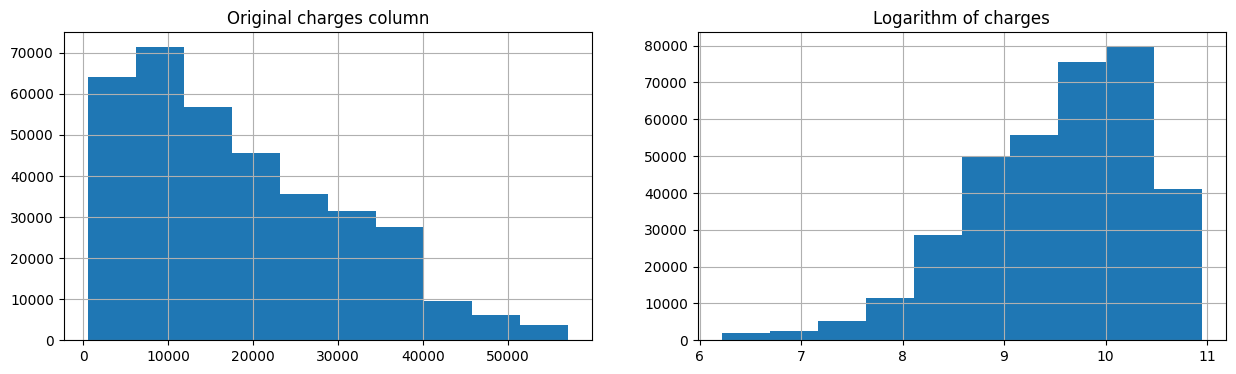

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15, 4))
ax[0].hist(vehicle['price'])
ax[0].grid()
ax[0].set_title('Original charges column')
ax[1].hist(np.log1p(vehicle['price']))
ax[1].grid()
ax[1].set_title('Logarithm of charges');

In [ ]:
!pip install category_encoders
import category_encoders as ce
from category_encoders.james_stein import JamesSteinEncoder

In [ ]:
# Build the encoder
encoder = ce.JamesSteinEncoder(cols=['manufacturer', 'model', 'region','condition',	'cylinders'	,'fuel',	'title_status',	'transmission',	'drive',	'type',	'paint_color',	'state'  ])

# Encode the frame and view it
vehicle_tranformed = encoder.fit_transform(vehicle, vehicle['price'])

# Look at the first few rows
vehicle_tranformed.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
247293,18705.579618,7900,2002,19965.335361,7900.0,19780.899623,15166.932114,17297.991357,95861,18512.759414,13758.517546,12526.664514,19513.143127,19338.016849,18647.928212
58020,17585.25692,800,1999,19965.335361,2518.33749,13047.256986,18775.839916,17297.991357,220000,18512.759414,16541.837835,12526.664514,19513.143127,19841.547575,18051.905736
393512,15830.741242,3500,1997,19965.335361,2518.33749,17180.61098,18775.839916,17297.991357,190000,18512.759414,16541.837835,12526.664514,19513.143127,17179.813787,17643.754558
105457,17321.075759,9999,2003,19965.335361,8689.149579,17180.61098,18775.839916,17297.991357,136371,18512.759414,13758.517546,12526.664514,19513.143127,17179.813787,18218.757851
125718,18599.656977,6000,2003,19965.335361,8689.149579,17180.61098,18775.839916,17297.991357,186567,18512.759414,13758.517546,12526.664514,19513.143127,16465.579521,19264.595463


In [ ]:
x = vehicle_tranformed.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, np.log1p(vehicle_tranformed['price']) ,test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
y_train

(246380, 14)
(105592, 14)


,price
167574,10.594157
297354,8.987197
212886,10.490969
163513,9.301186
232972,8.006701
...,...
203965,9.46506
215878,8.412055
426490,10.308819
418373,9.200391


## Building PolynomialFeatures

In [ ]:
poly_features = PolynomialFeatures(degree=3,include_bias=False)
X_train_poly = poly_features.fit_transform(X_train[['year','odometer', 'model', 'condition',		'title_status' ]])
X_test_poly = poly_features.fit_transform(X_test[['year','odometer', 'model', 'condition',		'title_status' ]])

columns = poly_features.get_feature_names_out()
train_df = pd.DataFrame(X_train_poly, columns=columns)
test_df = pd.DataFrame(X_test_poly, columns=columns)
train_df.head()

,year,odometer,model,condition,title_status,year^2,year odometer,year model,year condition,year title_status,...,model^3,model^2 condition,model^2 title_status,model condition^2,model condition title_status,model title_status^2,condition^3,condition^2 title_status,condition title_status^2,title_status^3
0,2012.0,164000.0,21727.703864,17180.610980,18512.759414,4048144.0,329968000.0,4.371614e+07,3.456739e+07,3.724767e+07,...,1.025750e+13,8.110848e+12,8.739746e+12,6.413440e+12,6.910725e+12,7.446568e+12,5.071259e+12,5.464474e+12,5.888178e+12,6.344735e+12
1,2011.0,171205.0,12122.484644,17180.610980,18512.759414,4044121.0,344293255.0,2.437832e+07,3.455021e+07,3.722916e+07,...,1.781455e+12,2.524770e+12,2.720536e+12,3.578235e+12,3.855684e+12,4.154645e+12,5.071259e+12,5.464474e+12,5.888178e+12,6.344735e+12
2,2020.0,12958.0,17481.899867,17180.610980,18512.759414,4080400.0,26175160.0,3.531344e+07,3.470483e+07,3.739577e+07,...,5.342763e+12,5.250684e+12,5.657811e+12,5.160192e+12,5.560302e+12,5.991436e+12,5.071259e+12,5.464474e+12,5.888178e+12,6.344735e+12
3,2004.0,91036.0,10950.000000,17180.610980,18512.759414,4016016.0,182436144.0,2.194380e+07,3.442994e+07,3.709957e+07,...,1.312932e+12,2.059998e+12,2.219726e+12,3.232149e+12,3.482763e+12,3.752809e+12,5.071259e+12,5.464474e+12,5.888178e+12,6.344735e+12
4,1999.0,200000.0,17707.476501,19780.899623,18512.759414,3996001.0,399800000.0,3.539725e+07,3.954202e+07,3.700701e+07,...,5.552263e+12,6.202395e+12,5.804763e+12,6.928652e+12,6.484461e+12,6.068746e+12,7.739949e+12,7.243746e+12,6.779355e+12,6.344735e+12


## Using SequentialFeatureSelector

In [ ]:
selector = SequentialFeatureSelector(LinearRegression(),n_features_to_select=5)
best_features = selector.fit_transform(train_df, y_train)
best_features_df = pd.DataFrame(best_features, columns=selector.get_feature_names_out())

best_features_df.head()

,odometer^2,year^3,year^2 model,year odometer^2,model^2 condition
0,2.689600e+10,8.144866e+09,8.795687e+10,5.411475e+13,8.110848e+12
1,2.931115e+10,8.132727e+09,4.902479e+10,5.894473e+13,2.524770e+12
2,1.679098e+08,8.242408e+09,7.133314e+10,3.391777e+11,5.250684e+12
3,8.287553e+09,8.048096e+09,4.397538e+10,1.660826e+13,2.059998e+12
4,4.000000e+10,7.988006e+09,7.075909e+10,7.996000e+13,6.202395e+12


In [ ]:
pipe = Pipeline([('column_selector',selector),('lin', LinearRegression())])
pipe.fit(train_df,y_train)
train_preds = pipe.predict(train_df)
test_preds = pipe.predict(test_df)
train_mse = mean_squared_error(train_preds, y_train)
test_mse = mean_squared_error(test_preds, y_test)


print(f'Train MSE: {train_mse: .2f}')
print(f'Test MSE: {test_mse: .2f}')
pipe


Train MSE:  0.25
Test MSE:  0.25


Pipeline(steps=[('column_selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=5)),
                ('lin', LinearRegression())])

In [ ]:
# train_lmse = mean_squared_error(np.expm1(train_preds), np.expm1(y_train))
# print(f'Train LMSE: {train_lmse: .2f}')

In [ ]:

results_ldf = pd.DataFrame({'Actual': np.expm1(y_train), 'Predicted': np.expm1(train_preds)})
results_df = pd.DataFrame({'Actual': (y_train), 'Predicted': (train_preds)})

print(results_df)
print(results_ldf)

           Actual  Predicted
167574  10.594157   9.702869
297354   8.987197   8.948935
212886  10.490969   9.931398
163513   9.301186   9.060516
232972   8.006701   8.682439
...           ...        ...
203965    9.46506   9.603923
215878   8.412055   8.512124
426490  10.308819  10.037637
418373   9.200391   9.234708
328422   9.846706   9.811365

[246380 rows x 2 columns]
         Actual     Predicted
167574  39900.0  16363.485860
297354   7999.0   7698.686941
212886  35988.0  20565.063939
163513  10950.0   8607.592565
232972   3000.0   5897.415189
...         ...           ...
203965  12900.0  14821.814617
215878   4500.0   4973.718720
426490  29995.0  22870.272793
418373   9900.0  10245.672196
328422  18895.0  18238.859887

[246380 rows x 2 columns]


In [ ]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=180,random_state=0, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
RFR.fit(train_df,y_train)


RandomForestRegressor(max_features=0.5, n_estimators=180, n_jobs=-1,
                      oob_score=True, random_state=0)

In [ ]:
train_preds = RFR.predict(train_df)
test_preds = RFR.predict(test_df)
train_mse = mean_squared_error(train_preds, y_train)
test_mse = mean_squared_error(test_preds, y_test)


print(f'Train MSE: {train_mse: .2f}')
print(f'Test MSE: {test_mse: .2f}')

Train MSE:  0.02
Test MSE:  0.12


In [ ]:
results_ldf = pd.DataFrame({'Actual': np.expm1(y_train), 'Predicted': np.expm1(train_preds)})
results_df = pd.DataFrame({'Actual': (y_train), 'Predicted': (train_preds)})

print(results_df)
print(results_ldf)

           Actual  Predicted
167574  10.594157  10.594157
297354   8.987197   8.988912
212886  10.490969  10.490608
163513   9.301186   9.273847
232972   8.006701   8.005060
...           ...        ...
203965    9.46506   9.465060
215878   8.412055   8.438015
426490  10.308819  10.286441
418373   9.200391   9.200391
328422   9.846706   9.885838

[246380 rows x 2 columns]
         Actual     Predicted
167574  39900.0  39900.000000
297354   7999.0   8012.735256
212886  35988.0  35975.021255
163513  10950.0  10654.661288
232972   3000.0   2995.079345
...         ...           ...
203965  12900.0  12900.000000
215878   4500.0   4618.374551
426490  29995.0  29331.205035
418373   9900.0   9900.000000
328422  18895.0  19649.101385

[246380 rows x 2 columns]
